## Grape Disease Classification

Dataset Source:- https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset

In [1]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import keras_tuner as kt

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS = 30

In [4]:
import os

os.listdir()

['.ipynb_checkpoints',
 'augmented-images',
 'dataset',
 'grape-images',
 'grape_disease_classification_final.ipynb']

splitfolders tool will split dataset into training, validation and test sets.

$ pip install split-folders

$ splitfolders --output dataset --ratio 0.8 0.1 0.1 -- ./grape-images -> Automatically creates dataset folder and then train, test, val folders from grape-images.

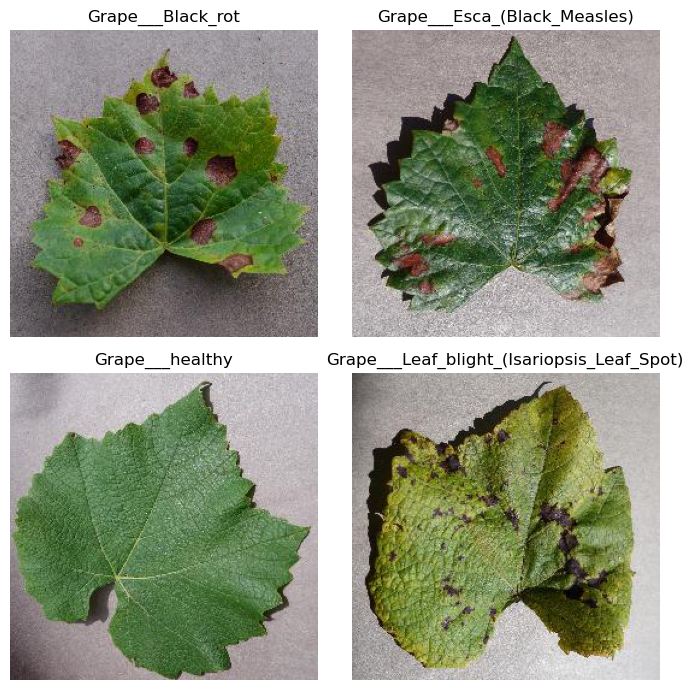

In [5]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

folders = ['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']

selected_images = []

# replace here with your directory
base_path = r"C:\Users\melbi\OneDrive\Desktop\dmml2-code\grape-images"


for folder in folders:
    folder_path = os.path.join(base_path, folder)
 
    files = os.listdir(folder_path)

    images = [f for f in files if f.endswith(('.JPG', '.PNG'))]
    
    if not images:
        print(f"No images found in {folder_path}")
        continue
    
    selected_image = random.choice(images)
    img_path = os.path.join(folder_path, selected_image)
    selected_images.append((Image.open(img_path), folder))

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
for (img, folder), ax in zip(selected_images, axs.flatten()):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(folder)

plt.tight_layout()
plt.show()


### Importing data into tensorflow dataset object

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        horizontal_flip=True,
        vertical_flip=True,
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
        # replace here with your directory
        save_to_dir=r"C:\Users\melbi\OneDrive\Desktop\dmml2-code\augmented-images"
)

Found 3248 images belonging to 4 classes.


In [7]:
train_generator.class_indices

{'Grape___Black_rot': 0,
 'Grape___Esca_(Black_Measles)': 1,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 2,
 'Grape___healthy': 3}

In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy']

In [9]:
count=0
for image_batch, label_batch in train_generator:
#   print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.66745675 0.6203979  0.6360842 ]
  [0.66369456 0.6166357  0.63232195]
  [0.65993226 0.61287344 0.6285597 ]
  ...
  [0.8210909  0.8054046  0.8093262 ]
  [0.8361318  0.82044554 0.8243671 ]
  [0.8632249  0.84753865 0.8514602 ]]

 [[0.7160861  0.66902727 0.68471354]
  [0.7111952  0.6641363  0.6798226 ]
  [0.70630425 0.65924543 0.6749317 ]
  ...
  [0.8218433  0.80615705 0.8100786 ]
  [0.84064645 0.8249602  0.82888174]
  [0.85720533 0.84151906 0.8454406 ]]

 [[0.7191301  0.6720713  0.68775755]
  [0.71988255 0.6728237  0.68851   ]
  [0.72063494 0.6735761  0.6892624 ]
  ...
  [0.8225957  0.80690944 0.810831  ]
  [0.8451612  0.8294749  0.8333965 ]
  [0.85118574 0.83549947 0.83942103]]

 ...

 [[0.57606006 0.52507967 0.55253065]
  [0.6492522  0.5982718  0.62572277]
  [0.646312   0.5953316  0.6227826 ]
  ...
  [0.59010285 0.570495   0.597946  ]
  [0.583707   0.56409913 0.5915501 ]
  [0.57731116 0.5577033  0.5851543 ]]

 [[0.5640208  0.5130404  0.5404914 ]
  [0.66768724 0.61670685 0.6441578 ]


In [10]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 405 images belonging to 4 classes.


In [11]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
)
test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 409 images belonging to 4 classes.


In [12]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.7725491  0.76470596 0.7843138 ]
  [0.7725491  0.76470596 0.7843138 ]
  [0.7725491  0.76470596 0.7843138 ]
  ...
  [0.57254905 0.4901961  0.50980395]
  [0.6431373  0.56078434 0.5803922 ]
  [0.54509807 0.46274513 0.48235297]]

 [[0.78823537 0.7803922  0.8000001 ]
  [0.7843138  0.77647066 0.7960785 ]
  [0.7803922  0.7725491  0.79215693]
  ...
  [0.5294118  0.44705886 0.4666667 ]
  [0.60784316 0.5254902  0.54509807]
  [0.57254905 0.4901961  0.50980395]]

 [[0.78823537 0.7803922  0.8000001 ]
  [0.78823537 0.7803922  0.8000001 ]
  [0.7843138  0.77647066 0.7960785 ]
  ...
  [0.60784316 0.5254902  0.54509807]
  [0.6039216  0.52156866 0.5411765 ]
  [0.5254902  0.4431373  0.46274513]]

 ...

 [[0.78823537 0.7686275  0.7843138 ]
  [0.7843138  0.76470596 0.7803922 ]
  [0.7803922  0.7607844  0.77647066]
  ...
  [0.5882353  0.47058827 0.4784314 ]
  [0.6156863  0.49803925 0.5058824 ]
  [0.65882355 0.5411765  0.54901963]]

 [[0.78823537 0.7686275  0.7843138 ]
  [0.7843138  0.76470596 0.7803922 ]


## Building the model

In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

C:\Users\melbi\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
3248/32

101.5

In [17]:
405/32

12.65625

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=101,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=12,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30


C:\Users\melbi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.3463 - loss: 1.2567 - val_accuracy: 0.5417 - val_loss: 0.9992
Epoch 2/30
  1/101 ━━━━━━━━━━━━━━━━━━━━ 2:23 1s/step - accuracy: 0.5938 - loss: 0.9003

C:\Users\melbi\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5938 - loss: 0.9003 - val_accuracy: 0.4286 - val_loss: 0.9788
Epoch 3/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.6357 - loss: 0.7775 - val_accuracy: 0.5521 - val_loss: 1.2146
Epoch 4/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8438 - loss: 0.3335 - val_accuracy: 0.7619 - val_loss: 0.8763
Epoch 5/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.7863 - loss: 0.4989 - val_accuracy: 0.7656 - val_loss: 0.6461
Epoch 6/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8438 - loss: 0.4329 - val_accuracy: 0.6667 - val_loss: 0.5954
Epoch 7/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 289s 3s/step - accuracy: 0.8516 - loss: 0.3804 - val_accuracy: 0.8073 - val_loss: 0.4932
Epoch 8/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8438 - loss: 0.3102 - val_accuracy: 0.8095 - val_loss: 0.2930
Epoch 9/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.8938 - loss: 0.3018 - val_accuracy: 0.8880 - 

In [69]:
# Evaluate the model on the test set
scores = model.evaluate(test_generator)
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 445ms/step - accuracy: 0.9754 - loss: 0.0801
Test Loss: 0.07608786225318909
Test Accuracy: 0.9731051325798035


### Visualisation of Accuracy and Loss Curves

In [21]:
history

In [22]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 101}

In [23]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [24]:
len(history.history['loss'])

30

In [25]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.1211990118026733,
 0.9002615213394165,
 0.6852567195892334,
 0.3335438370704651,
 0.45530936121940613]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
acc

[0.4291044771671295,
 0.59375,
 0.6999378204345703,
 0.84375,
 0.8112562298774719,
 0.84375,
 0.8476368188858032,
 0.84375,
 0.8964552283287048,
 1.0,
 0.9319030046463013,
 0.90625,
 0.9356343150138855,
 0.90625,
 0.9490049481391907,
 0.90625,
 0.9477611780166626,
 1.0,
 0.9689054489135742,
 0.875,
 0.9626865386962891,
 0.9375,
 0.9689054489135742,
 1.0,
 0.9800994992256165,
 0.9375,
 0.9552238583564758,
 0.96875,
 0.976057231426239,
 1.0]

In [28]:
val_acc

[0.5416666865348816,
 0.4285714328289032,
 0.5520833134651184,
 0.761904776096344,
 0.765625,
 0.6666666865348816,
 0.8072916865348816,
 0.8095238208770752,
 0.8880208134651184,
 0.9047619104385376,
 0.8984375,
 0.9047619104385376,
 0.9114583134651184,
 1.0,
 0.9270833134651184,
 0.9047619104385376,
 0.9583333134651184,
 0.8095238208770752,
 0.9635416865348816,
 0.8571428656578064,
 0.8515625,
 0.9047619104385376,
 0.9479166865348816,
 0.9523809552192688,
 0.9661458134651184,
 0.9523809552192688,
 0.9765625,
 1.0,
 0.9479166865348816,
 1.0]

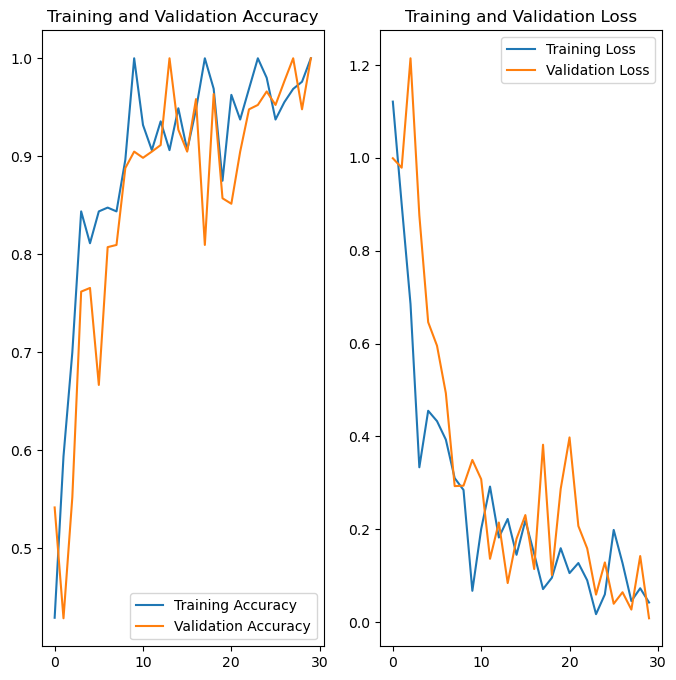

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Prediction on a sample image

first image to predict
actual label: Grape___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
predicted label: Grape___healthy


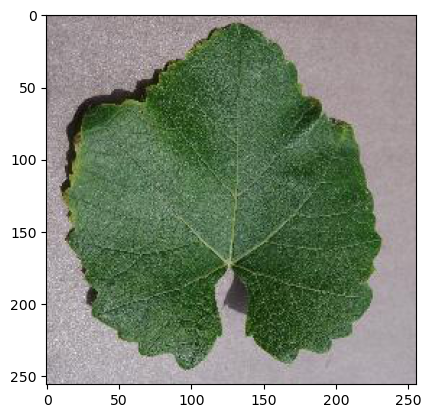

In [31]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


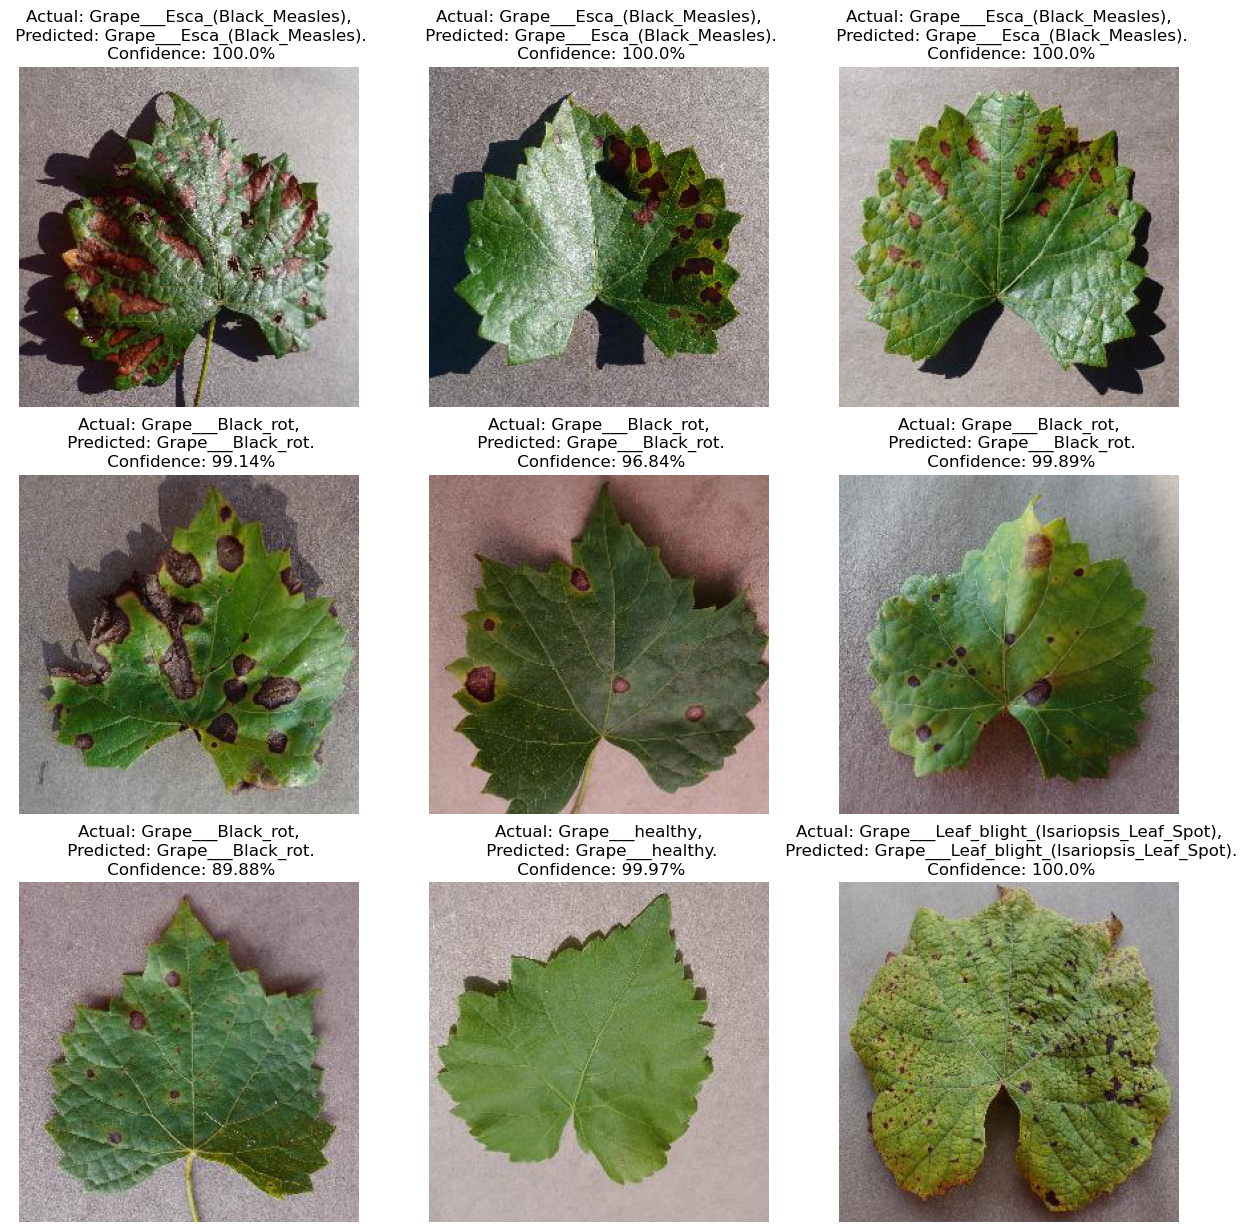

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the model

In [34]:
model.save("./grapes-1.h5")

## Training model including hyperparameter tuning

In [35]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4


# Model Definition for Hyperparameter Tuning
def build_model(hp):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))

    # Define the number of convolutional blocks
    for i in range(hp.Int('conv_blocks', 2, 3, default=2)):
        model.add(layers.Conv2D(
            filters=hp.Choice(f'filters_{i}', values=[32, 48]),
            kernel_size=(3, 3),
            activation='relu'
        ))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(48, activation='relu'))  # Fixed dense units
    model.add(layers.Dense(n_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # Fixed learning rate
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [36]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=12,
    factor=3,
    directory='keras_tuner_dir',
    project_name='grape_disease_classification'
)

C:\Users\melbi\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [37]:
# Run the hyperparameter search
tuner.search(train_generator, epochs = 12, validation_data = validation_generator)

Trial 23 Complete [00h 22m 37s]
val_accuracy: 0.9012345671653748

Best val_accuracy So Far: 0.9555555582046509
Total elapsed time: 04h 53m 54s


In [38]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [71]:
the best hyperparameters
for hyperparameter in best_hps.values:
    print(f"{hyperparameter}: {best_hps.get(hyperparameter)}")

conv_blocks: 3
filters_0: 32
filters_1: 48
filters_2: 48
tuner/epochs: 12
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012


In [54]:
# Build and train the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history2 = best_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

C:\Users\melbi\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.5072 - loss: 1.2126 - val_accuracy: 0.6716 - val_loss: 1.5621
Epoch 2/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.8174 - loss: 0.4759 - val_accuracy: 0.7877 - val_loss: 0.8883
Epoch 3/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 348s 3s/step - accuracy: 0.8797 - loss: 0.3005 - val_accuracy: 0.8420 - val_loss: 0.5043
Epoch 4/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.9031 - loss: 0.2630 - val_accuracy: 0.8938 - val_loss: 0.2831
Epoch 5/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 385s 3s/step - accuracy: 0.8933 - loss: 0.2687 - val_accuracy: 0.8741 - val_loss: 0.4349
Epoch 6/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.8984 - loss: 0.2496 - val_accuracy: 0.8148 - val_loss: 0.8392
Epoch 7/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - accuracy: 0.9200 - loss: 0.2065 - val_accuracy: 0.8667 - val_loss: 0.4884
Epoch 8/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 351s 3s/step - accuracy: 0.9254 - loss: 0.1873 - val_accu

In [56]:
# Evaluate the model on the test set
scores = best_model.evaluate(test_generator)
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step - accuracy: 0.9909 - loss: 0.0214
Test Loss: 0.022812677547335625
Test Accuracy: 0.9902200698852539


### Visualization of Accuracy and Loss Curves

In [72]:
history2.params

{'verbose': 'auto', 'epochs': 30, 'steps': 102}

In [73]:
history2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [74]:
len(history2.history['loss'])

30

In [75]:
history2.history['loss'][:5] # show loss for first 5 epochs

[0.844637393951416,
 0.4155852496623993,
 0.30549877882003784,
 0.2640979588031769,
 0.2568494975566864]

In [76]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

In [77]:
EPOCHS = 30

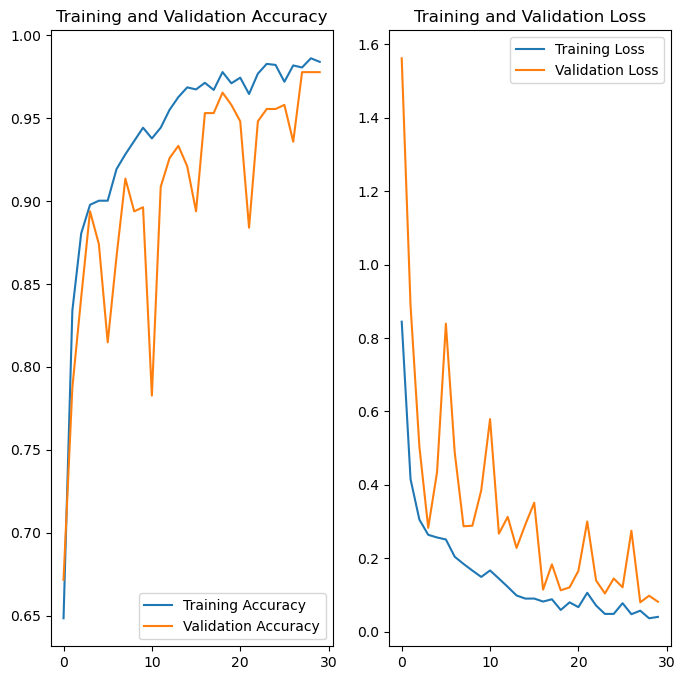

In [78]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Prediction on a sample image

first image to predict
actual label: Grape___Esca_(Black_Measles)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
predicted label: Grape___Esca_(Black_Measles)


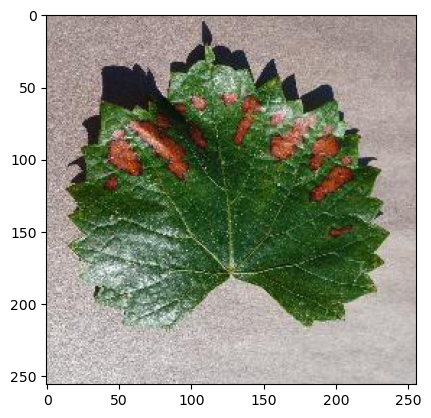

In [79]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = best_model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

In [80]:
def predict(best_model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = best_model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


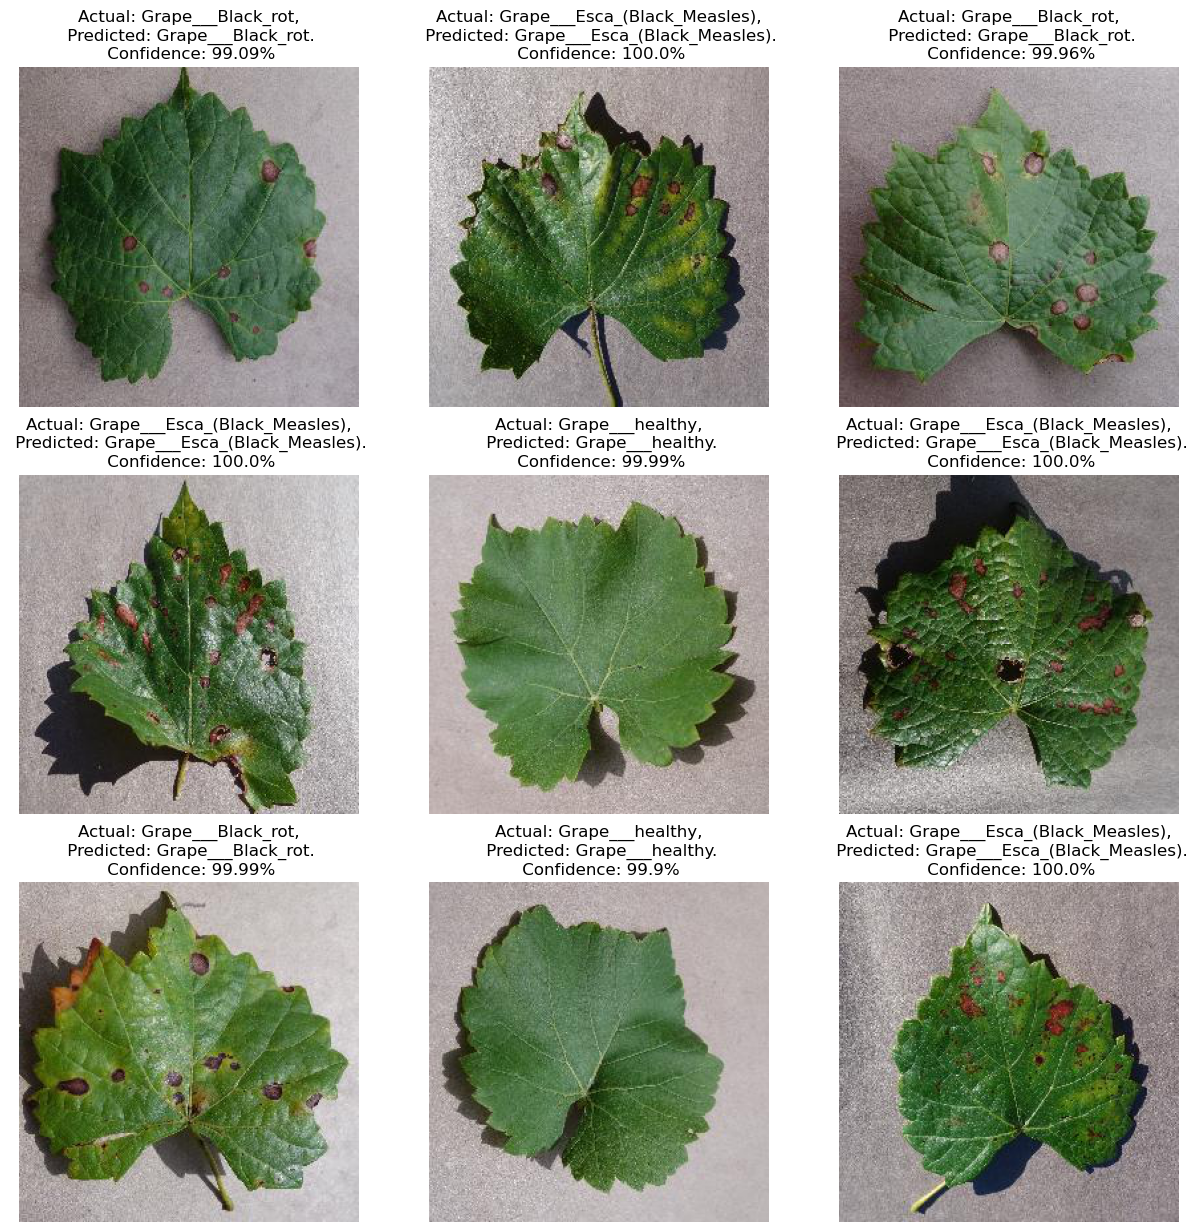

In [81]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(best_model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

### Saving the model

In [68]:
best_model.save("./grapes-2.h5")